# Minimal example to illustrate OpenCL Issue #

Problem in `OpenCL` called from `napari_simpleitk_image_processing.label_statistics`

Jamie White 2023-01-30

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle  # version 0.19.3
import napari
from napari_simpleitk_image_processing import label_statistics

In [2]:
from skimage import data as sample_data

## Check pyopencl ##

`pyopencl` appears to access the M1 GPU correctly

In [11]:
# Import the Python OpenCL API
import pyopencl as cl

# Create a list of all the platform IDs
platforms = cl.get_platforms()

print("\nNumber of OpenCL platforms:", len(platforms))
print( "\n-------------------------")

for p in platforms:
    
    print( "Platform:", p.name)
    print( "Vendor:", p.vendor)
    print( "Version:", p.version)
    # Discover all devices
    devices = p.get_devices()
    print("Number of devices:", len(devices))
    
     # Investigate each device
    for d in devices:
        
        print("\t-------------------------")
        # Print out some information about the devices
        print("\t\tName:", d.name)
        print("\t\tVersion:", d.opencl_c_version)
        print("\t\tMax. Compute Units:", d.max_compute_units)
        print("\t\tLocal Memory Size:", d.local_mem_size/1024, "KB")
        print("\t\tGlobal Memory Size:", d.global_mem_size/(1024*1024), "MB")
        print("\t\tMax Alloc Size:", d.max_mem_alloc_size/(1024*1024), "MB")
        print("\t\tMax Work-group Total Size:", d.max_work_group_size)

        # Find the maximum dimensions of the work-groups
        dim = d.max_work_item_sizes
        print("\t\tMax Work-group Dims:(", dim[0], " ".join(map(str, dim[1:])), ")")

        print("\t-------------------------")

    print("\n-------------------------")


Number of OpenCL platforms: 1

-------------------------
Platform: Apple
Vendor: Apple
Version: OpenCL 1.2 (Aug  8 2022 21:29:55)
Number of devices: 1
	-------------------------
		Name: Apple M1
		Version: OpenCL C 1.2 
		Max. Compute Units: 8
		Local Memory Size: 32.0 KB
		Global Memory Size: 10922.671875 MB
		Max Alloc Size: 2048.0 MB
		Max Work-group Total Size: 256
		Max Work-group Dims:( 256 256 256 )
	-------------------------

-------------------------


## Loading 'nuclei'
Manually loading the nuclei data from napari ui via Open example->napari->Cells(3d+2ch).

In [4]:
image = sample_data.cells3d()
image.shape

(60, 2, 256, 256)

In [5]:
membranes = image[30, 0]
membranes.shape

(256, 256)

In [6]:
nuclei = image[30, 1]
nuclei.shape

(256, 256)

In [7]:
viewer = napari.Viewer()
viewer.add_image(membranes, colormap='cyan', blending='translucent')
viewer.add_image(nuclei, colormap='magenta', blending='additive');

## voronoi otsu labeling

cl.OCLArray([[ 0,  0,  0, ..., 33, 33, 33],
       [ 0,  0,  0, ..., 33, 33, 33],
       [ 0,  0,  0, ..., 33, 33, 33],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
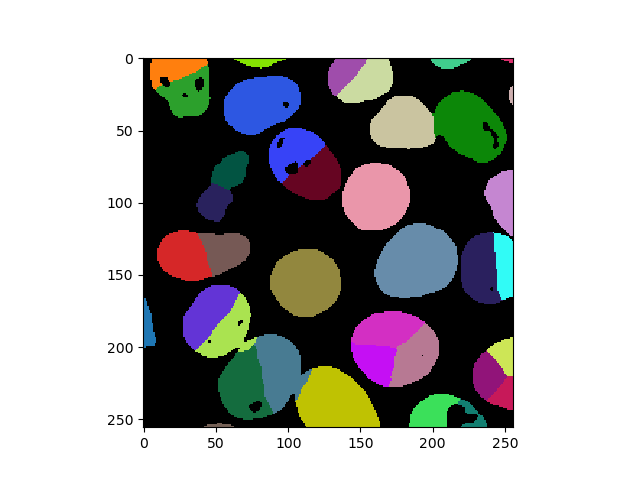

In [9]:
image1_vol = cle.voronoi_otsu_labeling(nuclei, None, 7.0, 2.0)
image1_vol

In [10]:
statistics = label_statistics(nuclei, image1_vol, 
                              intensity=True, 
                              size=True, 
                              shape=True, 
                              perimeter=False, 
                              position=False,
                              moments=False
                             )

UNSUPPORTED (log once): buildComputeProgram: cl2Metal failed


RuntimeError: clBuildProgram failed: BUILD_PROGRAM_FAILURE - clBuildProgram failed: BUILD_PROGRAM_FAILURE - clBuildProgram failed: BUILD_PROGRAM_FAILURE

Build on <pyopencl.Device 'Apple M1' on 'Apple' at 0x6000014547a0>:

Compiler encountered an internal error
(options: -I /Users/jwhite/miniforge3/envs/tf-napari/lib/python3.10/site-packages/pyopencl/cl)
(source saved as /var/folders/vg/pkq1xs_x1b559nk61kjgcgkh0000gn/T/tmp9_xrwq8p.cl)